In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def accuracy_score(y_test, y_pred, algorithm):
  # r2_score
  R2 = r2_score(y_test, y_pred)
  # RMSE
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  # MAE
  mae = mean_absolute_error(y_test, y_pred)
  return (R2, rmse, mae)

def plot_residuals(Y_test, Y_pred):
  indexes = list(range(1, len(Y_pred)+1))[:100]
  fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
  axs.plot(indexes, Y_pred[:100], label='predicted_price', color='red')
  axs.plot(indexes, Y_test[:100], label='actual_price', color='blue')
  axs.legend()
  axs.set_ylabel('Price')
  fig.suptitle('Predicted Price VS Actual Price')
  plt.show()

In [ ]:
df = pd.read_csv("car-data-handle.csv")

In [ ]:
df.head()

,Unnamed: 0,brand,name,year,model,seat,fuel,capacity,origin,gear,price
0,0,Ford,Ford Everest Titanium 2.0L 4x2 AT - 2023,2023,SUV,7,Dầu,2.0,Nhập khẩu,Số tự động,1276000000
1,1,Peugeot,Peugeot 3008 GT - 2022,2022,Crossover,5,Xăng,1.6,Lắp ráp trong nước,Số tự động,1209000000
2,2,Kia,Kia K5 Luxury 2.0 AT - 2023,2023,Sedan,5,Xăng,2.0,Lắp ráp trong nước,Số tự động,884000000
3,3,Ford,Ford Ranger Wildtrak 2.0L 4x4 AT - 2023,2023,Bán tải / Pickup,5,Dầu,2.0,Lắp ráp trong nước,Số tự động,924000000
4,4,Mazda,Mazda cx3 Luxury 1.5 AT - 2023,2023,Crossover,5,Xăng,1.5,Nhập khẩu,Số tự động,620000000


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,brand,name,year,model,seat,fuel,capacity,origin,gear,price
0,Ford,Ford Everest Titanium 2.0L 4x2 AT - 2023,2023,SUV,7,Dầu,2.0,Nhập khẩu,Số tự động,1276000000
1,Peugeot,Peugeot 3008 GT - 2022,2022,Crossover,5,Xăng,1.6,Lắp ráp trong nước,Số tự động,1209000000
2,Kia,Kia K5 Luxury 2.0 AT - 2023,2023,Sedan,5,Xăng,2.0,Lắp ráp trong nước,Số tự động,884000000
3,Ford,Ford Ranger Wildtrak 2.0L 4x4 AT - 2023,2023,Bán tải / Pickup,5,Dầu,2.0,Lắp ráp trong nước,Số tự động,924000000
4,Mazda,Mazda cx3 Luxury 1.5 AT - 2023,2023,Crossover,5,Xăng,1.5,Nhập khẩu,Số tự động,620000000


# Encode Categorical Data
## Encode Independent variable in data


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(data, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    return data

label_encoder(df, 'brand')
label_encoder(df, 'name')
label_encoder(df, 'model')
label_encoder(df, 'fuel')
label_encoder(df, 'origin')
label_encoder(df, 'gear')

,brand,name,year,model,seat,fuel,capacity,origin,gear,price
0,5,18,2023,3,7,0,2.0,1,3,1276000000
1,17,498,2022,1,5,2,1.6,0,3,1209000000
2,11,307,2023,4,5,2,2.0,0,3,884000000
3,5,36,2023,0,5,0,2.0,0,3,924000000
4,13,430,2023,1,5,2,1.5,1,3,620000000
...,...,...,...,...,...,...,...,...,...,...
5995,9,110,2022,1,5,2,1.5,1,3,569000000
5996,5,36,2023,0,5,0,2.0,0,3,895000000
5997,11,288,2023,6,8,0,2.2,0,3,1369000000
5998,5,41,2023,0,5,0,2.2,0,3,677000000


# Initialize X, Y


In [ ]:
X = df.iloc[:, :-1].values
X

array([[5.000e+00, 1.800e+01, 2.023e+03, ..., 2.000e+00, 1.000e+00,
        3.000e+00],
       [1.700e+01, 4.980e+02, 2.022e+03, ..., 1.600e+00, 0.000e+00,
        3.000e+00],
       [1.100e+01, 3.070e+02, 2.023e+03, ..., 2.000e+00, 0.000e+00,
        3.000e+00],
       ...,
       [1.100e+01, 2.880e+02, 2.023e+03, ..., 2.200e+00, 0.000e+00,
        3.000e+00],
       [5.000e+00, 4.100e+01, 2.023e+03, ..., 2.200e+00, 0.000e+00,
        3.000e+00],
       [1.700e+01, 5.060e+02, 2.022e+03, ..., 2.000e+00, 0.000e+00,
        3.000e+00]])

In [ ]:
Y = df.iloc[:, -1].values
Y

array([1276000000, 1209000000,  884000000, ..., 1369000000,  677000000,
       1559000000])

# Split dataset to X_train Y_train, X_test Y_test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[:, :3] = scaler.fit_transform(X_train[:, :3])

In [ ]:
X_train

array([[ 1.40421628,  1.18328171,  0.47096624, ...,  1.8       ,
         1.        ,  3.        ],
       [-0.70884352, -0.96915392,  0.47096624, ...,  1.5       ,
         0.        ,  3.        ],
       [-0.56797286, -0.84204158,  0.47096624, ...,  1.5       ,
         1.        ,  3.        ],
       ...,
       [-0.56797286, -0.57086858,  0.47096624, ...,  2.5       ,
         0.        ,  3.        ],
       [-1.13145548, -1.15134827,  0.47096624, ...,  2.2       ,
         0.        ,  3.        ],
       [-1.13145548, -1.09626626,  0.47096624, ...,  1.5       ,
         0.        ,  3.        ]])

In [ ]:
X_test[:, :3] = scaler.fit_transform(X_test[:, :3])

In [ ]:
X_test

array([[ 1.56791887,  1.53849035,  0.51648635, ...,  0.2       ,
         0.        ,  3.        ],
       [-0.2891561 , -0.03513501,  0.51648635, ...,  1.6       ,
         0.        ,  3.        ],
       [ 1.13936311,  1.03252906, -1.81352728, ...,  1.5       ,
         1.        ,  3.        ],
       ...,
       [ 1.42506695,  1.1654511 , -1.81352728, ...,  1.8       ,
         1.        ,  3.        ],
       [ 1.13936311,  1.03252906, -1.81352728, ...,  1.5       ,
         1.        ,  3.        ],
       [ 0.28225159,  0.58659708,  0.51648635, ...,  2.4       ,
         1.        ,  3.        ]])

# Trainning Model
## Use RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=1)

In [ ]:
Y_pred = rf.predict(X_test)

In [ ]:
pd.DataFrame({'y' : Y_test, 'Y_pred' : Y_pred})

,y,Y_pred
0,1120000000,1.106712e+09
1,669000000,6.774083e+08
2,540000000,5.617311e+08
3,885000000,9.209809e+08
4,913000000,1.044737e+09
...,...,...
1195,700000000,5.662400e+08
1196,536000000,5.570692e+08
1197,786000000,7.905013e+08
1198,564000000,5.617311e+08


In [ ]:
# Evaluation by R2, RMSE, MAE
R2_rf, rmse_rf, mae_rf = accuracy_score(Y_test, Y_pred, rf)
print('R2:', R2_rf)
print('RMSE:', rmse_rf)
print('MAE:', mae_rf)

R2: 0.8530750456604352
RMSE: 105769763.10775372
MAE: 57789856.06762834


# Correlation Graph Y_test, Y_pred

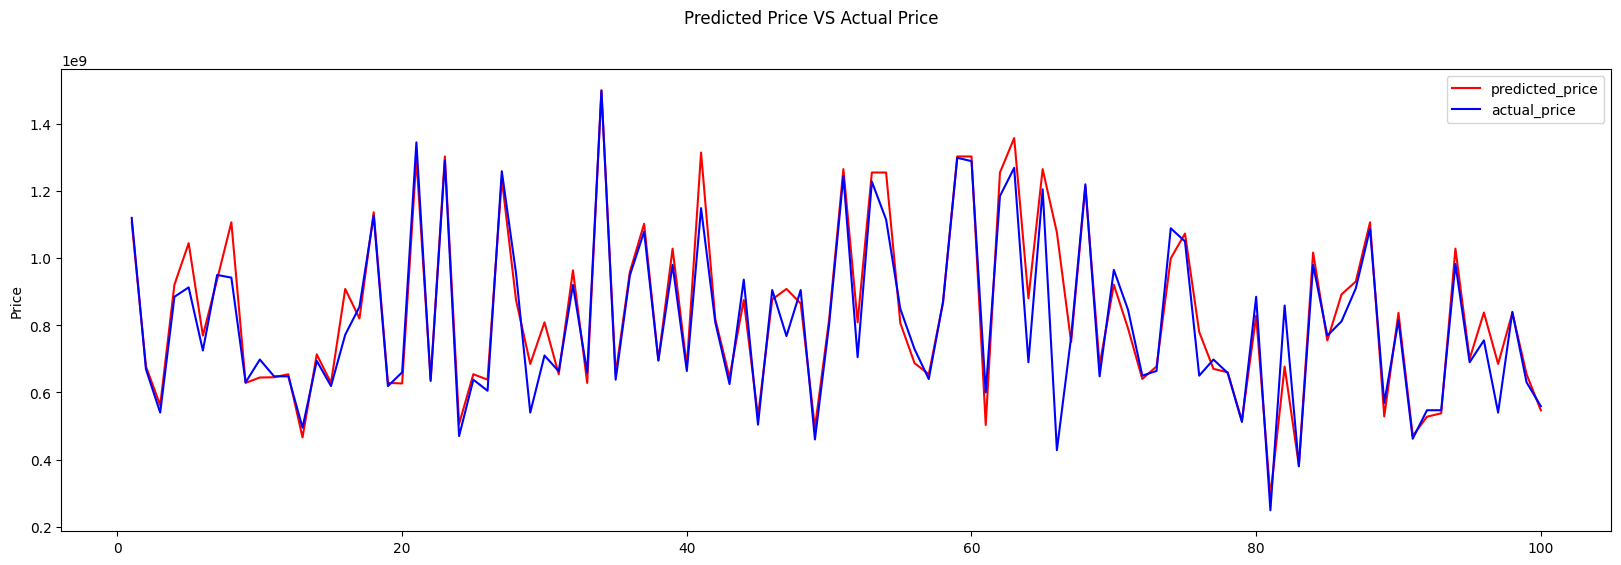

In [ ]:
plot_residuals(Y_test, Y_pred)

# Trainning Model
## Using XGBoost Regression

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

In [ ]:
parameter_grid = {
  'n_estimators': n_estimators,
  'max_depth':max_depth,
  'learning_rate':learning_rate,
  'min_child_weight':min_child_weight,
  'booster':booster,
  'base_score':base_score
}

In [ ]:
regressor = xgb.XGBRegressor()

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=3,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=1100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
random_cv.best_params_

{'n_estimators': 1100,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 0.75}

## Trainning again with best params

In [ ]:
regressor = xgb.XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=1, monotone_constraints=None,
             n_estimators=1100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42)

In [ ]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=1, monotone_constraints=None,
             n_estimators=1100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
Y_pred_xgb = regressor.predict(X_test)

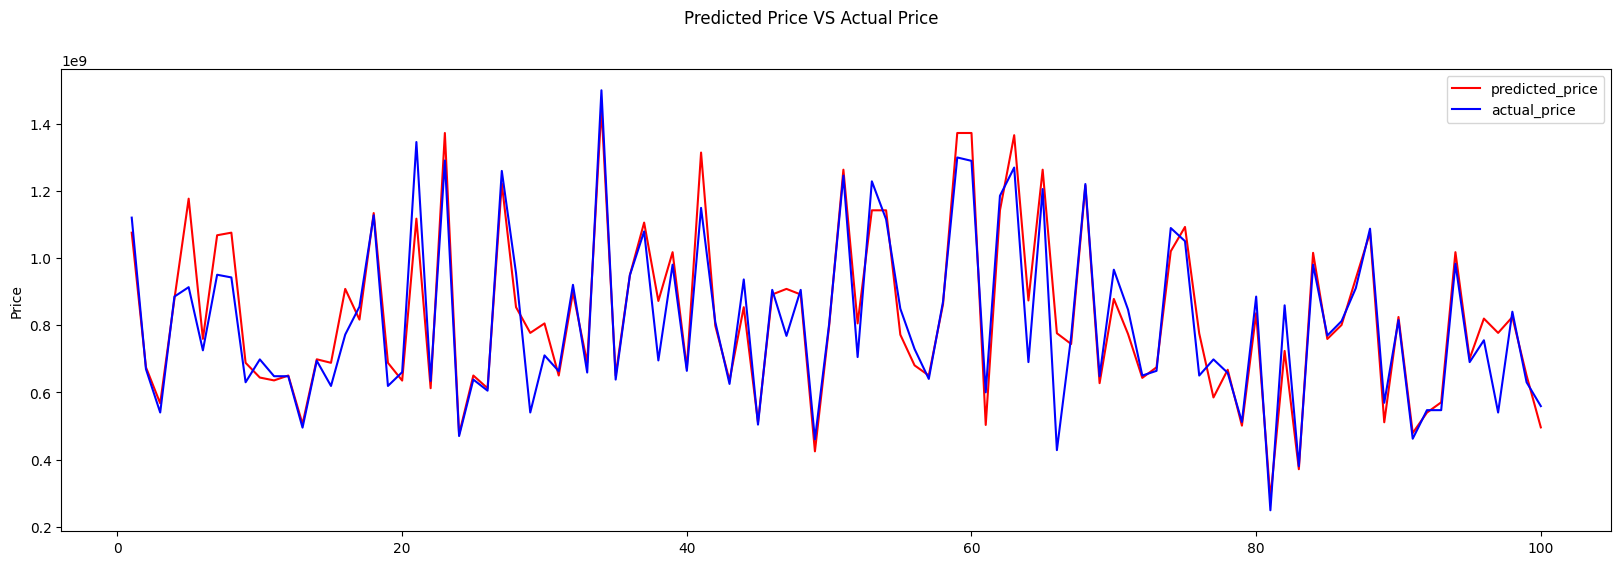

In [ ]:
plot_residuals(Y_test, Y_pred_xgb)

In [ ]:
R2_xgb, rmse_xgb, mae_xgb = accuracy_score(Y_test, Y_pred_xgb, regressor)
print('R2:', R2_xgb)
print('RMSE:', rmse_xgb)
print('MAE:', mae_xgb)

R2: 0.8720029561447225
RMSE: 98721948.65448146
MAE: 61073155.8


# Compare RandomForest Regression and XGBoost Regression 

In [ ]:
results = pd.DataFrame(columns=['Algorithm', 'R2', 'RMSE', 'MAE'])
results.loc[0] = ['RandomForest Regression', R2_rf, rmse_rf, mae_rf]
results.loc[1] = ['XGBoost Regression', R2_xgb, rmse_xgb, mae_xgb]
results.head()

,Algorithm,R2,RMSE,MAE
0,RandomForest Regression,0.853075,1.057698e+08,5.778986e+07
1,XGBoost Regression,0.872003,9.872195e+07,6.107316e+07


- Thông số MAE của thuật toán RandomForest Regression nhỏ hơn XGBooots Regression, điều đó cho thấy độ sai lệch các giá trị của thuật toán RandomForest Regression ít hơn
- Hiệu suất R2 của XGBoost lại cao hơn một ít và RMSE thấp hơn cho thấy mô hình XGBoost dự đoán tốt hơn.
- Điều này xảy ra có thể do chọn các thông số của XGBoost chưa đạt hiệu quả cao nhất.
- Trong thực tế tùy vào dữ liệu và mục đích sử dụng có thể chọn một trong 2 mô hình trên.

#### Lưu file model

In [ ]:
# import pickle

# filenameRF = 'model_rf.pkl'
# filenameXGB = 'model_XGB.pkl'
# with open(filenameRF, 'wb') as file:
#     pickle.dump(rf, file)

# with open(filenameXGB, 'wb') as file:
#     pickle.dump(regressor, file)
